In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the train, test, and validation data directories
train_dir = 'C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/train'
test_dir = 'C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/test'
valid_dir = 'C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/valid'

# Define image dimensions and batch size
img_width, img_height = 640, 640
batch_size = 32

# Create data generators with augmentation for train data and without augmentation for test and validation data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the CNN model

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # Update to 4 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc}')


Found 6513 images belonging to 5 classes.
Found 312 images belonging to 5 classes.
Found 622 images belonging to 5 classes.
Epoch 1/10
203/203 [==============================] - 3346s 17s/step - loss: 0.9066 - accuracy: 0.6758 - val_loss: 0.5032 - val_accuracy: 0.8125
Epoch 2/10
203/203 [==============================] - 1907s 9s/step - loss: 0.4444 - accuracy: 0.8320 - val_loss: 0.3583 - val_accuracy: 0.8734
Epoch 3/10
203/203 [==============================] - 1723s 8s/step - loss: 0.3734 - accuracy: 0.8587 - val_loss: 0.3241 - val_accuracy: 0.8701
Epoch 4/10
203/203 [==============================] - 1722s 8s/step - loss: 0.3370 - accuracy: 0.8733 - val_loss: 0.4244 - val_accuracy: 0.8701
Epoch 5/10
203/203 [==============================] - 1733s 9s/step - loss: 0.3084 - accuracy: 0.8823 - val_loss: 0.2489 - val_accuracy: 0.9161
Epoch 6/10
203/203 [==============================] - 1662s 8s/step - loss: 0.2869 - accuracy: 0.8925 - val_loss: 0.2456 - val_accuracy: 0.9112
Epoch 7/10


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 638, 638, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 319, 319, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 317, 317, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 158, 158, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 156, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 78, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 76, 128)       1

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the example image
example_image_path = 'C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/test/pre/WBC-Malignant-Pre-027_jpg.rf.1abfc5383cf5e34abb629b4e660ac80a.jpg'
example_img = image.load_img(example_image_path, target_size=(img_width, img_height))

# Preprocess the image for prediction
example_img_array = image.img_to_array(example_img)
example_img_array = np.expand_dims(example_img_array, axis=0)  # Add batch dimension
example_img_array = example_img_array / 255.0  # Normalize pixel values

# Make predictions using the trained model
predictions = model.predict(example_img_array)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
class_labels = train_generator.class_indices  # Assuming train_generator was used for training

# Map predicted class index to class label
predicted_class_label = None
for label, index in class_labels.items():
    if index == predicted_class_index:
        predicted_class_label = label
        break

print(f'Predicted class label: {predicted_class_label}')


Predicted class label: pre


In [8]:
model.save('C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/saved_model.h5')


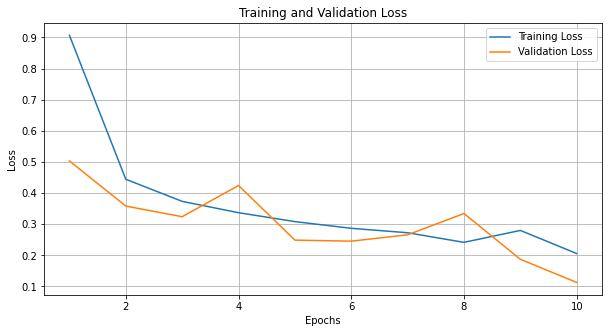

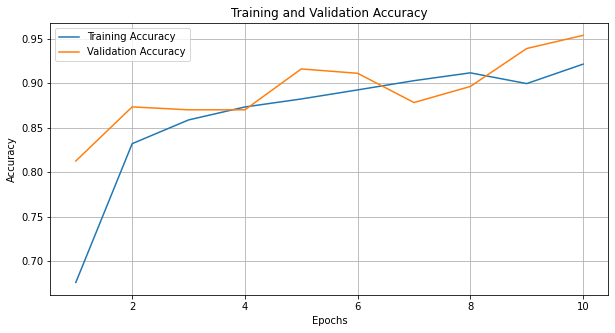

In [9]:
import matplotlib.pyplot as plt

# Define the training history (replace these with your actual values)
history = {
    'loss': [0.9066, 0.4444, 0.3734, 0.3370, 0.3084, 0.2869, 0.2726, 0.2418, 0.2801, 0.2058],
    'accuracy': [0.6758, 0.8320, 0.8587, 0.8733, 0.8823, 0.8925, 0.9029, 0.9117, 0.8996, 0.9215],
    'val_loss': [0.5032, 0.3583, 0.3241, 0.4244, 0.2489, 0.2456, 0.2660, 0.3344, 0.1874, 0.1130],
    'val_accuracy': [0.8125, 0.8734, 0.8701, 0.8701, 0.9161, 0.9112, 0.8783, 0.8964, 0.9391, 0.9539]
}

epochs = range(1, 11)  # Assuming 10 epochs based on your output

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, history['loss'], label='Training Loss')
plt.plot(epochs, history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import tensorflow as tf
import os
import cv2
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Define the path to your test image data directory
test_data_dir = 'C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/test'

# Load images from the test directory
X_test = []
y_test = []

categories = ['pre', 'pro', 'Early', 'benign']  # Make sure this matches your class labels

for category in categories:
    path = os.path.join(test_data_dir, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        img_array = cv2.resize(img_array, (640, 640))  # Resize images to match model input shape
        X_test.append(img_array)
        y_test.append(class_num)

# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalize pixel values
X_test = X_test.astype('float32') / 255.0

# Make predictions using your trained model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate classification report
class_names = ['pre', 'pro', 'Early', 'benign']  # Make sure this matches your class labels
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)


error: OpenCV(4.5.3) D:\bld\libopencv_1632857399304\work\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [14]:
import cv2
import os
import tensorflow as tf

import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# Assuming you have defined X_test, y_test, and class_num earlier in your code

# Iterate through images in the directory
for img in os.listdir(path):
    img_path = os.path.join(path, img)
    img_array = cv2.imread(img_path)
    
    # Check if the image array is not empty
    if img_array is not None:
        img_array = cv2.resize(img_array, (640, 640))  # Resize images to match model input shape
        X_test.append(img_array)
        y_test.append(class_num)
    else:
        print(f"Error loading image: {img_path}")

# Continue with the rest of your code (e.g., model evaluation)
# Convert lists to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Normalize pixel values
X_test = X_test.astype('float32') / 255.0

# Make predictions using your trained model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print evaluation metrics
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generate classification report
class_names = ['pre', 'pro', 'Early', 'benign']  # Make sure this matches your class labels
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

Error loading image: C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/test\pre\desktop.ini


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [22]:
import cv2
import os
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Define class names and their corresponding indices
class_names = ['pre', 'pro', 'benign', 'early','labels']  # Adjust based on your classes
class_indices = {class_name: index for index, class_name in enumerate(class_names)}

# Initialize empty lists for storing images and labels
X_test = []
y_test = []

# Load your trained model
#model = load_model('path_to_your_model')

# Load and preprocess images from the test directory
test_dir = 'C:/Users/ejuma_jrrzjzq/cap-5.2/Capstone-V-Leaukemia Detection/test'
for label in os.listdir(test_dir):
    if label not in class_indices:
        continue  # Skip labels not present in class_indices
    class_num = class_indices[label]  # Get the class index based on the label
    class_dir = os.path.join(test_dir, label)
    for img_file in os.listdir(class_dir):
        if not img_file.endswith(('.png', '.jpg', '.jpeg')):
            continue  # Skip non-image files
        img_path = os.path.join(class_dir, img_file)
        try:
            img = image.load_img(img_path, target_size=(640, 640))  # Load and resize image
            img_array = image.img_to_array(img) / 255.0  # Convert image to array and normalize
            X_test.append(img_array)
            y_test.append(class_num)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

# Convert lists to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Make predictions using the loaded model
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Generate classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)


              precision    recall  f1-score   support

         pre       0.00      0.00      0.00     103.0
         pro       0.00      0.00      0.00      73.0
      benign       0.00      0.00      0.00      47.0
       early       0.00      0.00      0.00      89.0
      labels       0.00      0.00      0.00       0.0

    accuracy                           0.00     312.0
   macro avg       0.00      0.00      0.00     312.0
weighted avg       0.00      0.00      0.00     312.0



C:\Users\ejuma_jrrzjzq\anaconda3\envs\env_2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejuma_jrrzjzq\anaconda3\envs\env_2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ejuma_jrrzjzq\anaconda3\envs\env_2\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Use